In [40]:
#%%
import pickle as pkl
from collections import defaultdict
import pandas as pd

output_path = None


edacc_l1_accents = {"us", "uk", "irish", "scottish", "american"}

def load_results(predictions_path):
    '''
    Return dictionary with distribution of predictions by accent
    '''
    with open(predictions_path, "rb") as f:
        eval_data = pkl.load(f)
    
    predictions_by_accent = defaultdict(lambda: defaultdict(int))
    for prediction, accent in zip(eval_data["preds"], eval_data["accents"]):
        if accent in edacc_l1_accents:
            continue
        predictions_by_accent[accent][prediction] += 1

    return predictions_by_accent


    # results_by_accent = defaultdict(lambda: defaultdict(int))
    # print(list(zip(eval_data["preds"], eval_data["accents"], eval_data["labels"])))
    # for prediction, accent, label in zip(eval_data["preds"], eval_data["accents"], eval_data["labels"]):
    #     if prediction == label:
    #         results_by_accent[accent]["correct"] += 1
    #     results_by_accent[accent]["total"] += 1
    # # %%

    # # Merge "us" and "american"  accents
    # results_by_accent["us"] = {k: results_by_accent["us"].get(k, 0) + results_by_accent["american"].get(k, 0) for k in set(results_by_accent["us"]) | set(results_by_accent["american"])}
    # # results_by_accent["us"]["total"] = sum([results_by_accent["us"]["total"], results_by_accent["american"]["total"]])
    # del results_by_accent["american"]


    # for accent, results in results_by_accent.items():
    #     results_by_accent[accent]["accuracy"] = round(results["correct"]/results["total"], 1)
    #     print(f"Accuracy for {accent}: {results['correct']/results['total']}")
    #     print(f"Total samples for {accent}: {results['total']}")
    #     print()



In [41]:
def get_eval_data(predictions_path):
    '''
    Return dictionary with distribution of predictions by accent
    '''

    with open(predictions_path, "rb") as f:
        eval_data = pkl.load(f)

    eval_data_filtered = {"preds": [], "accents": [], "labels": []}
    for prediction, accent, label in zip(eval_data["preds"], eval_data["accents"], eval_data["labels"]):
        if accent in edacc_l1_accents:
            continue
        eval_data_filtered["preds"].append(prediction)
        eval_data_filtered["accents"].append(accent)
        eval_data_filtered["labels"].append(label)

    return eval_data_filtered

In [42]:

# %%

# ET model
et_predictions_path = "/home/hltcoe/nbafna/projects/mitigating-accent-bias-in-lid/prelim_evals/preds/edacc_predictions/en_predictions.pkl"

# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"
# SSL-based model
ssl_predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-10000/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-500/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"

# Phoneseq-based model
ps_predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/phoneseq_exps/vl107/wav2vec2-xlsr-53-espeak-cv-ft/attentions-linear-8/phoneseq_lid_model_outputs/edacc_new_predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/phoneseq_exps/fleurs/wav2vec2-xlsr-53-espeak-cv-ft/attentions-linear-8/phoneseq_lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/fleurs/wav2vec2-large-xlsr-53-layer21-5000/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl" 
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-10000/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-500/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-10000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"

# ET+Phoneseq model
etps_predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/reps-phoneseq_exps/vl107/ecapa-tdnn_wav2vec2-xlsr-53-espeak-cv-ft/attentions-linear-8/reps-phoneseq_lid_model_outputs/edacc_predictions.pkl"
# output_path = "wav2vec2-base-layer8-100/accuracy.csv"


In [43]:
et_eval_data = get_eval_data(et_predictions_path)
ps_eval_data = get_eval_data(ps_predictions_path)
etps_eval_data = get_eval_data(etps_predictions_path)




In [44]:
ps_eval_data["accents"] == etps_eval_data["accents"] == et_eval_data["accents"]

True

In [45]:
def print_top_3_confusions(preds_by_accent):
    # Normalize the predictions
    for accent, predictions in preds_by_accent.items():
        total = sum(predictions.values()) - predictions["en"]
        for prediction, count in predictions.items():
            preds_by_accent[accent][prediction] = round((count/total)*100, 1) if total > 0 else 0

    # Print out the top 3 confusions for each accent
    for accent, predictions in preds_by_accent.items():
        print(f"Top 3 confusions for {accent}:")
        for prediction, count in sorted([x for x in predictions.items() if x[0] != "en"], key=lambda x: x[1], reverse=True)[:3]:
            print(f"{prediction}: {count}")
        print()

def get_top_3_confusions(preds_by_accent):
    # Normalize the predictions
    for accent, predictions in preds_by_accent.items():
        total = sum(predictions.values()) - predictions["en"]
        for prediction, count in predictions.items():
            preds_by_accent[accent][prediction] = round((count/total)*100, 1) if total > 0 else 0
            # preds_by_accent[accent][prediction] = count if total > 0 else 0

    top_confusions = defaultdict(lambda: defaultdict(float))
    for accent, predictions in preds_by_accent.items():
        for prediction, count in sorted([x for x in predictions.items() if x[0] != "en"], key=lambda x: x[1], reverse=True)[:3]:
            top_confusions[accent][prediction] = count

    return top_confusions


def get_top_3_preds_abs(preds_by_accent):
    # Normalize the predictions
    for accent, predictions in preds_by_accent.items():
        total = sum(predictions.values())
        for prediction, count in predictions.items():
            preds_by_accent[accent][prediction] = round((count/total)*100, 1) if total > 0 else 0


    top_confusions = defaultdict(lambda: defaultdict(float))
    for accent, predictions in preds_by_accent.items():
        for prediction, count in sorted([x for x in predictions.items()], key=lambda x: x[1], reverse=True)[:3]:
            top_confusions[accent][prediction] = count

    return top_confusions
    

In [46]:
# We'll only find confusions for predictions that ET got wrong
et_predictions_by_accent = defaultdict(lambda: defaultdict(int))
ps_predictions_by_accent = defaultdict(lambda: defaultdict(int))
etps_predictions_by_accent = defaultdict(lambda: defaultdict(int))
etps_predictions_by_accent_all = defaultdict(lambda: defaultdict(int))

for et_prediction, ps_prediction, etps_prediction, accent in zip(et_eval_data["preds"], ps_eval_data["preds"], etps_eval_data["preds"], et_eval_data["accents"]):
    if et_prediction != "en":
        et_predictions_by_accent[accent][et_prediction] += 1
        ps_predictions_by_accent[accent][ps_prediction] += 1
        etps_predictions_by_accent[accent][etps_prediction] += 1
    etps_predictions_by_accent_all[accent][etps_prediction] += 1

In [47]:
et_top_confusions = get_top_3_confusions(et_predictions_by_accent)
ps_top_confusions = get_top_3_confusions(ps_predictions_by_accent)
etps_top_confusions = get_top_3_confusions(etps_predictions_by_accent)
etps_top_confusions_all = get_top_3_confusions(etps_predictions_by_accent_all)

# et_top_confusions = get_top_3_preds_abs(et_predictions_by_accent)
# ps_top_confusions = get_top_3_preds_abs(ps_predictions_by_accent)
# etps_top_confusions = get_top_3_preds_abs(etps_predictions_by_accent)
# etps_top_confusions_all = get_top_3_confusions(etps_predictions_by_accent_all)

et_top_confusions = {accent: [(k, v) for k, v in et_top_confusions[accent].items()] for accent in et_top_confusions}
ps_top_confusions = {accent: [(k, v) for k, v in ps_top_confusions[accent].items()] for accent in ps_top_confusions}
etps_top_confusions = {accent: [(k, v) for k, v in etps_top_confusions[accent].items()] for accent in etps_top_confusions}
etps_top_confusions_all = {accent: [(k, v) for k, v in etps_top_confusions_all[accent].items()] for accent in etps_top_confusions_all}


geo_top_confusions = {'italian': [('cy', 25.5), ('ga', 10.4), ('mt', 4.7)],
 'lithuanian': [('ga', 20.1), ('cy', 15.9), ('sv', 9.2)],
 'bulgarian': [('cy', 24.0), ('sv', 7.6), ('bg', 7.4)],
 'korean': [('cy', 48.1), ('ga', 14.8), ('af', 3.7)],
 'uk': [('cy', 53.3), ('ga', 10.4), ('es', 4.7)],
 'dutch': [('nl', 30.7), ('ga', 21.6), ('cy', 13.6)],
 'chinese': [('cy', 31.2), ('ga', 12.2), ('es', 6.7)],
 'indian': [('cy', 16.7), ('ur', 7.4), ('ga', 6.4)],
 'sinhalese': [('cy', 25.7), ('sd', 6.4), ('ga', 6.4)],
 'scottish': [('ga', 39.1), ('cy', 37.1), ('da', 5.0)],
 'japanese': [('cy', 30.7), ('cmn', 8.9), ('ko', 7.9)],
 'romanian': [('cy', 21.2), ('ro', 5.3), ('es', 4.6)],
 'pakistani': [('ga', 26.6), ('sd', 11.0), ('cy', 7.2)],
 'polish': [('cy', 28.9), ('ga', 22.3), ('sv', 5.7)],
 'ecuadorian': [('cy', 27.6), ('ga', 13.8), ('es', 10.3)],
 'american': [('cy', 57.7), ('es', 7.7), ('ga', 7.7)],
 'spanish': [('cy', 29.3), ('ga', 11.1), ('ca', 9.3)],
 'catalan': [('cy', 24.8), ('ca', 24.3), ('ga', 6.8)],
 'shona': [('cy', 25.4), ('sn', 6.0), ('sv', 6.0)],
 'french': [('oc', 20.4), ('ig', 15.0), ('cy', 14.3)],
 'russian': [('cy', 24.5), ('ga', 11.8), ('ru', 8.2)],
 'icelandic': [('cy', 37.2), ('ga', 29.5), ('es', 10.3)],
 'nigerian': [('oc', 16.7), ('cy', 13.8), ('yo', 11.3)],
 'filipino': [('ceb', 21.2), ('cy', 13.6), ('fil', 12.9)],
 'tagalog': [('cy', 50.0), ('es', 30.0), ('ceb', 10.0)],
 'colombian': [('cy', 31.1), ('ga', 9.9), ('es', 7.9)],
 'mexican': [('cy', 23.4), ('es', 13.3), ('ga', 9.4)],
 'kenyan': [('cy', 25.8), ('es', 5.7), ('sw', 5.4)],
 'montenegrin': [('cy', 45.5), ('es', 18.2), ('tg', 9.1)],
 'ghanian': [('oc', 20.2), ('cy', 17.1), ('ig', 11.6)],
 'indonesian': [('cy', 19.7), ('ms', 11.1), ('es', 6.7)],
 'egyptian': [('ga', 33.1), ('cy', 20.2), ('es', 5.1)],
 'south african': [('cy', 42.9), ('ga', 9.5), ('sv', 9.1)],
 'macedonian': [('cy', 37.3), ('ga', 11.9), ('sv', 8.5)],
 'irish': [('ga', 44.9), ('cy', 29.2), ('es', 3.7)],
 'jamaican': [('cy', 21.1), ('oc', 8.1), ('ga', 7.4)],
 'brazilian': [('cy', 15.7), ('sv', 15.7), ('nb', 7.4)],
 'vietnamese': [('cy', 25.8), ('km', 4.2), ('es', 4.2)],
 'israeli': [('cy', 16.5), ('he', 14.2), ('bg', 6.1)],
 'chilean': [('cy', 35.5), ('ga', 18.3), ('sv', 7.1)],
 'us': [('cy', 29.8), ('ga', 13.2), ('es', 9.9)]}



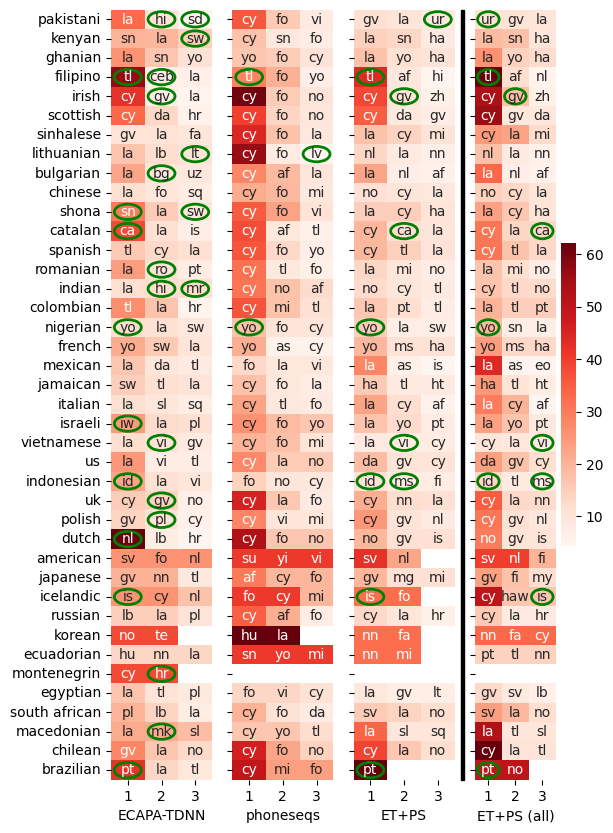

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

confusions_ET = defaultdict(list, et_top_confusions)
confusions_PS = defaultdict(list, ps_top_confusions)
confusions_ETPS = defaultdict(list, etps_top_confusions)
confusions_ETPS_all = defaultdict(list, etps_top_confusions_all)

accent_language_map = {
    "pakistani": ["hi", "ur", "sd"],
    "kenyan": ["sw"],
    "ghanian": [],
    "filipino": ["tl", "ceb"],
    "irish": ["gv"],
    "scottish": ["gd"],
    "sinhalese": [],
    "lithuanian": ["lt", "lv"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar"],
    "vietnamese": ["vi", "hmn"],
    "us": [],
    "indonesian": ["id", "jv", "ms"],
    "uk": ["gv"],
    "polish": ["pl", "cs"],
    "dutch": ["nl"],
    "american": [],
    "japanese": ["ja", "ryu"],
    "icelandic": ["is"],
    "russian": ["ru"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}



# Your data (confusions_ET, confusions_PS, accent_language_map) remains the same

accent_groups = [list(accent_language_map.keys())[i:i+40] for i in range(0, len(accent_language_map), 40)]
accents = accent_language_map.keys()

# Create subplots with 2 columns (one for ET and one for PS)
fig, axes = plt.subplots(1, 4, figsize=(6, 10), sharey=False)

# Put space between subplots
# plt.subplots_adjust(wspace=0.5)
# Put space between subplot 2 and 3
plt.subplots_adjust(wspace=0.2)
# Get the position of the third subplot (axes[2])
pos = axes[2].get_position()

# Add a thick vertical black line between subplot 3 and 4
fig.patches.append(plt.Rectangle((pos.x1 + 0.01, pos.y0), 0.005, pos.y1 - pos.y0, 
                                 transform=fig.transFigure, color='black', zorder=10))

# Make subplot 0 and 2 wider

# axes[0].set_position([0.1, 0.1, 0.4, 0.8])
# axes[2].set_position([0.5, 0.1, 0.4, 0.8])

# Put thick black line between subplot 2 and 3

# axes[2].vlines(x=axes[1].get_xlim()[0] - 3, ymin=axes[1].get_ylim()[0], ymax=axes[1].get_ylim()[1], color='black', linewidth=2)
# axes[1].plot([axes[1].get_xlim()[1], axes[1].get_xlim()[1]], [axes[1].get_ylim()[0], axes[1].get_ylim()[1]], color='black', linewidth=2)



cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):

    # print("idx", idx)
    labels_et = []
    values_et = []
    row_labels_et = []

    labels_ps = []
    values_ps = []
    row_labels_ps = []

    labels_etps = []
    values_etps = []
    row_labels_etps = []

    labels_etps_all = []
    values_etps_all = []
    row_labels_etps_all = []

    for accent in accents:
        # For ET
        labels_et.append([conf[0] for conf in confusions_ET[accent]])
        values_et.append([conf[1] for conf in confusions_ET[accent]])
        row_labels_et.append(f"{accent}")

        # For PS
        labels_ps.append([conf[0] for conf in confusions_PS[accent]])
        values_ps.append([conf[1] for conf in confusions_PS[accent]])
        row_labels_ps.append(f"{accent}")

        # For ET+PS
        labels_etps.append([conf[0] for conf in confusions_ETPS[accent]])
        values_etps.append([conf[1] for conf in confusions_ETPS[accent]])
        row_labels_etps.append(f"{accent}")

        # For ET+PS
        labels_etps_all.append([conf[0] for conf in confusions_ETPS_all[accent]])
        values_etps_all.append([conf[1] for conf in confusions_ETPS_all[accent]])
        row_labels_etps_all.append(f"{accent}")

    # DataFrames for ET and PS
    df_et = pd.DataFrame(values_et, columns=["1", "2", "3"], index=row_labels_et)
    labels_df_et = pd.DataFrame(labels_et, columns=["1", "2", "3"], index=row_labels_et)

    df_ps = pd.DataFrame(values_ps, columns=["1", "2", "3"])
    labels_df_ps = pd.DataFrame(labels_ps, columns=["1", "2", "3"], index=row_labels_ps)

    df_etps = pd.DataFrame(values_etps, columns=["1", "2", "3"])
    labels_df_etps = pd.DataFrame(labels_etps, columns=["1", "2", "3"], index=row_labels_etps)

    df_etps_all = pd.DataFrame(values_etps_all, columns=["1", "2", "3"])
    labels_df_etps_all = pd.DataFrame(labels_etps_all, columns=["1", "2", "3"], index=row_labels_etps_all)

    # ET heatmap (left column)
    ax_et = axes[0]
    cbar = False  # No color bar for ET
    vmax = None
    sns.heatmap(df_et, annot=labels_df_et, fmt="", cmap=cmap, ax=ax_et, cbar=cbar, vmax=vmax)
    ax_et.set_xlabel(f"ECAPA-TDNN")

    # PS heatmap (right column)
    ax_ps = axes[1]
    cbar = False  # Only show color bar for the rightmost subfigure
    sns.heatmap(df_ps, annot=labels_df_ps, fmt="", cmap=cmap, ax=ax_ps, cbar=cbar, vmax=vmax)
    ax_ps.set_xlabel(f"phoneseqs")

    # ET+PS heatmap (right column)
    ax_etps = axes[2]
    cbar = False # Only show color bar for the rightmost subfigure
    sns.heatmap(df_etps, annot=labels_df_etps, fmt="", cmap=cmap, ax=ax_etps, cbar=cbar, vmax=vmax)
    ax_etps.set_xlabel(f"ET+PS")

    # ET+PS heatmap (right column)
    ax_etps_all = axes[3]
    cbar = True # Only show color bar for the rightmost subfigure
    sns.heatmap(df_etps_all, annot=labels_df_etps_all, fmt="", cmap=cmap, ax=ax_etps_all, cbar=cbar, vmax=vmax) #cbar_kws={'label': 'Percentage of samples'}
    ax_etps_all.set_xlabel(f"ET+PS (all)")

    # Highlight accent-related languages and add thick black lines for both ET and PS
    for i, accent in enumerate(row_labels_et):
        base_accent = accent  # Remove "ET" or "PS" part
        for j in range(3):
            if labels_df_et.iloc[i, j] in accent_language_map[base_accent]:
                ax_et.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_et.get_xlim()
        #     ax_et.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for ET

        # Repeat for PS (right column)
        for j in range(3):
            if labels_df_ps.iloc[i, j] in accent_language_map[base_accent]:
                ax_ps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        
        for j in range(3):
            if labels_df_etps.iloc[i, j] in accent_language_map[base_accent]:
                ax_etps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        for j in range(3):
            if labels_df_etps_all.iloc[i, j] in accent_language_map[base_accent]:
                ax_etps_all.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))
        # if i % 2 == 1:
        #     x_min, x_max = ax_ps.get_xlim()
        #     ax_ps.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for PS

    # Set the labels for the yticks, which show for each subplot
    ax_et.set_yticks(np.arange(len(row_labels_et)) + 0.5, labels=row_labels_et)
    # Set empty yticks for PS
    ax_ps.set_yticks(np.arange(len(row_labels_ps)) + 0.5, labels=["" for _ in range(len(row_labels_ps))])
    ax_etps.set_yticks(np.arange(len(row_labels_etps)) + 0.5, labels=["" for _ in range(len(row_labels_etps))])
    ax_etps_all.set_yticks(np.arange(len(row_labels_etps_all)) + 0.5, labels=["" for _ in range(len(row_labels_etps_all))])

# Set the common y-label for all subplots
# axes[0, 0].set_ylabel("Accents")
# axes[0, 1].set_ylabel("Accents")

plt.savefig("accent_confusions.pdf", bbox_inches='tight')


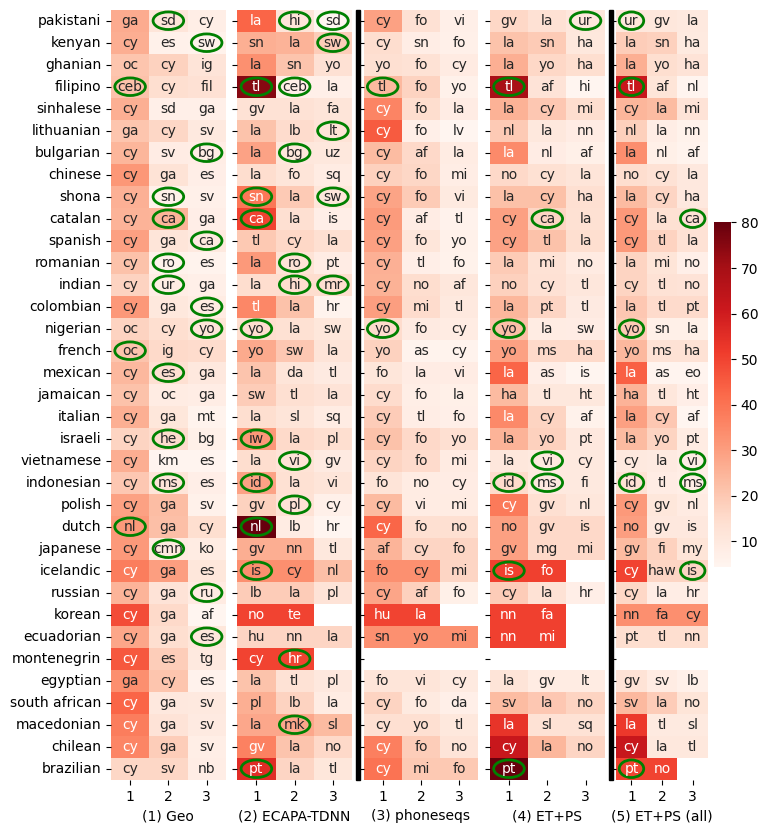

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



confusions_ET = defaultdict(list, et_top_confusions)
confusions_PS = defaultdict(list, ps_top_confusions)
confusions_ETPS = defaultdict(list, etps_top_confusions)
confusions_ETPS_all = defaultdict(list, etps_top_confusions_all)
confusions_geo = defaultdict(list, geo_top_confusions)

accent_language_map = {
    "pakistani": ["hi", "ur", "sd"],
    "kenyan": ["sw"],
    "ghanian": [],
    "filipino": ["tl", "ceb"],
    "irish": ["gv", "ga"],
    "scottish": ["gd"],
    "sinhalese": [],
    "lithuanian": ["lt"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te", "ur"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar", "he"],
    "vietnamese": ["vi", "hmn"],
    "us": [],
    "indonesian": ["id", "jv", "ms"],
    "uk": ["gv"],
    "polish": ["pl", "cs"],
    "dutch": ["nl"],
    "american": [],
    "japanese": ["ja", "ryu", "cmn"],
    "icelandic": ["is"],
    "russian": ["ru"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}



# Your data (confusions_ET, confusions_PS, accent_language_map) remains the same

accent_groups = [list(accent_language_map.keys())[i:i+40] for i in range(0, len(accent_language_map), 40)]
accents = [accent for accent in accent_language_map.keys() if accent not in edacc_l1_accents]

# Create subplots with 2 columns (one for ET and one for PS)
fig, axes = plt.subplots(1, 5, figsize=(8, 10), sharey=False)

# Put space between subplots
# plt.subplots_adjust(wspace=0.5)
# Put space between subplot 2 and 3
plt.subplots_adjust(wspace=0.1)

# Get the position of the second subplot (axes[1])
pos = axes[1].get_position()

# Add a thick vertical black line between subplot 3 and 4
fig.patches.append(plt.Rectangle((pos.x1 + 0.005, pos.y0), 0.005, pos.y1 - pos.y0, 
                                 transform=fig.transFigure, color='black', zorder=5))


# Get the position of the fourth subplot (axes[3])
pos = axes[3].get_position()

# Add a thick vertical black line between subplot 4 and 5
fig.patches.append(plt.Rectangle((pos.x1 + 0.005, pos.y0), 0.005, pos.y1 - pos.y0, 
                                 transform=fig.transFigure, color='black', zorder=5))

# Make subplot 0 and 2 wider

# axes[0].set_position([0.1, 0.1, 0.4, 0.8])
# axes[2].set_position([0.5, 0.1, 0.4, 0.8])

# Put thick black line between subplot 2 and 3

# axes[2].vlines(x=axes[1].get_xlim()[0] - 3, ymin=axes[1].get_ylim()[0], ymax=axes[1].get_ylim()[1], color='black', linewidth=2)
# axes[1].plot([axes[1].get_xlim()[1], axes[1].get_xlim()[1]], [axes[1].get_ylim()[0], axes[1].get_ylim()[1]], color='black', linewidth=2)



cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):
    accents = [accent for accent in accents if accent not in edacc_l1_accents]

    # print("idx", idx)
    labels_et = []
    values_et = []
    row_labels_et = []

    labels_ps = []
    values_ps = []
    row_labels_ps = []

    labels_etps = []
    values_etps = []
    row_labels_etps = []

    labels_etps_all = []
    values_etps_all = []
    row_labels_etps_all = []

    labels_geo = []
    values_geo = []
    row_labels_geo = []

    for accent in accents:
        # For ET
        labels_et.append([conf[0] for conf in confusions_ET[accent]])
        values_et.append([conf[1] for conf in confusions_ET[accent]])
        row_labels_et.append(f"{accent}")

        # For PS
        labels_ps.append([conf[0] for conf in confusions_PS[accent]])
        values_ps.append([conf[1] for conf in confusions_PS[accent]])
        row_labels_ps.append(f"{accent}")

        # For ET+PS
        labels_etps.append([conf[0] for conf in confusions_ETPS[accent]])
        values_etps.append([conf[1] for conf in confusions_ETPS[accent]])
        row_labels_etps.append(f"{accent}")

        # For ET+PS
        labels_etps_all.append([conf[0] for conf in confusions_ETPS_all[accent]])
        values_etps_all.append([conf[1] for conf in confusions_ETPS_all[accent]])
        row_labels_etps_all.append(f"{accent}")

        # For Geo
        labels_geo.append([conf[0] for conf in confusions_geo[accent]])
        values_geo.append([conf[1] for conf in confusions_geo[accent]])
        row_labels_geo.append(f"{accent}")

    # DataFrames for ET and PS
    df_et = pd.DataFrame(values_et, columns=["1", "2", "3"], index=row_labels_et)
    labels_df_et = pd.DataFrame(labels_et, columns=["1", "2", "3"], index=row_labels_et)

    df_ps = pd.DataFrame(values_ps, columns=["1", "2", "3"])
    labels_df_ps = pd.DataFrame(labels_ps, columns=["1", "2", "3"], index=row_labels_ps)

    df_etps = pd.DataFrame(values_etps, columns=["1", "2", "3"])
    labels_df_etps = pd.DataFrame(labels_etps, columns=["1", "2", "3"], index=row_labels_etps)

    df_etps_all = pd.DataFrame(values_etps_all, columns=["1", "2", "3"])
    labels_df_etps_all = pd.DataFrame(labels_etps_all, columns=["1", "2", "3"], index=row_labels_etps_all)

    df_geo = pd.DataFrame(values_geo, columns=["1", "2", "3"], index=row_labels_geo)
    labels_df_geo = pd.DataFrame(labels_geo, columns=["1", "2", "3"], index=row_labels_geo)

    # ET heatmap (left column)
    ax_et = axes[1]
    cbar = False  # No color bar for ET
    vmax = 80
    sns.heatmap(df_et, annot=labels_df_et, fmt="", cmap=cmap, ax=ax_et, cbar=cbar, vmax=vmax)
    ax_et.set_xlabel(f"(2) ECAPA-TDNN")

    # PS heatmap (right column)
    ax_ps = axes[2]
    cbar = False  # Only show color bar for the rightmost subfigure
    sns.heatmap(df_ps, annot=labels_df_ps, fmt="", cmap=cmap, ax=ax_ps, cbar=cbar, vmax=vmax)
    ax_ps.set_xlabel(f"(3) phoneseqs")

    # ET+PS heatmap (right column)
    ax_etps = axes[3]
    cbar = False # Only show color bar for the rightmost subfigure
    sns.heatmap(df_etps, annot=labels_df_etps, fmt="", cmap=cmap, ax=ax_etps, cbar=cbar,  vmax=vmax)
    ax_etps.set_xlabel(f"(4) ET+PS")

    # ET+PS heatmap (right column)
    ax_etps_all = axes[4]
    cbar = True # Only show color bar for the rightmost subfigure
    sns.heatmap(df_etps_all, annot=labels_df_etps_all, fmt="", cmap=cmap, ax=ax_etps_all, cbar=cbar,  vmax=vmax) #cbar_kws={'label': 'Percentage of samples'}
    ax_etps_all.set_xlabel(f"(5) ET+PS (all)")

    # GEO heatmap (right column)
    ax_geo = axes[0]
    cbar = False # Only show color bar for the rightmost subfigure
    sns.heatmap(df_geo, annot=labels_df_geo, fmt="", cmap=cmap, ax=ax_geo, cbar=cbar,  vmax=vmax) #cbar_kws={'label': 'Percentage of samples'}
    ax_geo.set_xlabel(f"(1) Geo")


    # Highlight accent-related languages and add thick black lines for both ET and PS
    for i, accent in enumerate(row_labels_et):
        base_accent = accent  # Remove "ET" or "PS" part
        for j in range(3):
            if labels_df_et.iloc[i, j] in accent_language_map[base_accent]:
                ax_et.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_et.get_xlim()
        #     ax_et.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for ET

        # Repeat for PS (right column)
        for j in range(3):
            if labels_df_ps.iloc[i, j] in accent_language_map[base_accent]:
                ax_ps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        
        for j in range(3):
            if labels_df_etps.iloc[i, j] in accent_language_map[base_accent]:
                ax_etps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        for j in range(3):
            if labels_df_etps_all.iloc[i, j] in accent_language_map[base_accent]:
                ax_etps_all.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        for j in range(3):
            if labels_df_geo.iloc[i, j] in accent_language_map[base_accent]:
                ax_geo.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))
        # if i % 2 == 1:
        #     x_min, x_max = ax_ps.get_xlim()
        #     ax_ps.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for PS

    # Set the labels for the yticks, which show for each subplot
    ax_geo.set_yticks(np.arange(len(row_labels_et)) + 0.5, labels=row_labels_et)
    # Set empty yticks for PS
    ax_ps.set_yticks(np.arange(len(row_labels_ps)) + 0.5, labels=["" for _ in range(len(row_labels_ps))])
    ax_etps.set_yticks(np.arange(len(row_labels_etps)) + 0.5, labels=["" for _ in range(len(row_labels_etps))])
    ax_etps_all.set_yticks(np.arange(len(row_labels_etps_all)) + 0.5, labels=["" for _ in range(len(row_labels_etps_all))])
    ax_et.set_yticks(np.arange(len(row_labels_geo)) + 0.5, labels=["" for _ in range(len(row_labels_geo))])

# Set the common y-label for all subplots
# axes[0, 0].set_ylabel("Accents")
# axes[0, 1].set_ylabel("Accents")

plt.savefig("accent_confusions.pdf", bbox_inches='tight')
